### 概率密度函数【Probability Density Function】【PDF】

In [7]:
!ls

code			 第八章 支持向量机.ipynb     第七章 决策树.ipynb
diabetes.csv		 第二章Matplotlib简介.ipynb  第三章 理论基础.ipynb
digits_svm.pkl		 第二章 Numpy运算.ipynb      第四章 K-近邻算法.ipynb
README.md		 第二章 pandas库.ipynb	     第五章 线性回归.ipynb
scikit_learn库.ipynb	 第九章 朴素贝叶斯.ipynb     第一章 机器学习介绍.ipynb
第八章 乳腺癌检测.ipynb  第六章 逻辑回归算法.ipynb


## TF-IDF  TF(Term Frequency)
TF:词频   
IDF:逆向文档指数

In [11]:
from sklearn.datasets import load_files
from time import time

In [14]:
print('loading train dataset...')
t = time()
news_train = load_files('code/datasets/mlcomp/379/train')
print("summary:{0}documents in {1} categories.".format(len(news_train.data),len(news_train.target_names)))
print('done in {0} second'.format(time() -t))

loading train dataset...
summary:13180documents in 20 categories.
done in 0.23250913619995117 second


In [18]:
len(news_train.data),len(news_train.target)

(13180, 13180)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

print('vectorizing rain dataset...')
t=time()
vectorizer = TfidfVectorizer(encoding='latin-1')
X_train = vectorizer.fit_transform((d for d in news_train.data))
print(news_train.filenames[0],X_train[0].getnnz())

vectorizing rain dataset...
code/datasets/mlcomp/379/train/talk.politics.misc/17860-178992 108


In [36]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
print('traning models ...'.format(time()-t))
t = time()
y_train = news_train.target
clf=MultinomialNB(alpha=0.0001)
clf.fit(X_train,y_train)
train_score = clf.score(X_train,y_train)
print('train score:{0}'.format(train_score))
print('done in{0} seconds'.format(time()-t))

traning models ...
train score:0.9978755690440061
done in0.3084237575531006 seconds


In [44]:
print('loading test dataset....')
t = time()
news_test = load_files('code/datasets/mlcomp/379/test')
print('done in{0} seconds'.format(time()-t))

loading test dataset....
done in0.10486412048339844 seconds


In [46]:
print('vectorizing test dataset...')
t = time()
X_test=vectorizer.transform(d for d in news_test.data)
y_test = news_test.target
print('number of non-zero features in samplt[{0}]:{1}'.format(
news_test.filenames[0],X_test[0].getnnz()))

vectorizing test dataset...
number of non-zero features in samplt[code/datasets/mlcomp/379/test/rec.autos/7429-103268]:61


In [48]:
pred = clf.predict(X_test[0])
print('redict:{0} is in category {1}'.format(news_test.filenames[0],
                                            news_test.target_names[pred[0]]))
print('actually:{0} is incategory {1}'.format(news_test.filenames[0],
                                             news_test.target_names[news_test.target[0]]))

redict:code/datasets/mlcomp/379/test/rec.autos/7429-103268 is in category rec.autos
actually:code/datasets/mlcomp/379/test/rec.autos/7429-103268 is incategory rec.autos


### 模型评价

In [49]:
print('redicting test dataset ...')
t0 = time()
pred=clf.predict(X_test)
print('done in %fs'%(time()-t0))

redicting test dataset ...
done in 0.055066s


In [50]:
from sklearn.metrics import classification_report
print('classification report in test set for classifier:')
print(clf)
print(classification_report(y_test,pred,target_names=news_test.target_names))

classification report in test set for classifier:
MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)
                          precision    recall  f1-score   support

             alt.atheism       0.90      0.91      0.91       245
           comp.graphics       0.80      0.90      0.85       298
 comp.os.ms-windows.misc       0.82      0.79      0.80       292
comp.sys.ibm.pc.hardware       0.81      0.80      0.81       301
   comp.sys.mac.hardware       0.90      0.91      0.91       256
          comp.windows.x       0.88      0.88      0.88       297
            misc.forsale       0.87      0.81      0.84       290
               rec.autos       0.92      0.93      0.92       324
         rec.motorcycles       0.96      0.96      0.96       294
      rec.sport.baseball       0.97      0.94      0.96       315
        rec.sport.hockey       0.96      0.99      0.98       302
               sci.crypt       0.95      0.96      0.95       297
         sci.electronics     

### 生成混淆矩阵

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)
print('confusion matrix:')
print(cm)

confusion matrix:
[[224   0   0   0   0   0   0   0   0   0   0   0   0   0   2   5   0   0
    1  13]
 [  1 267   5   5   2   8   1   1   0   0   0   2   3   2   1   0   0   0
    0   0]
 [  1  13 230  24   4  10   5   0   0   0   0   1   2   1   0   0   0   0
    1   0]
 [  0   9  21 242   7   2  10   1   0   0   1   1   7   0   0   0   0   0
    0   0]
 [  0   1   5   5 233   2   2   2   1   0   0   3   1   0   1   0   0   0
    0   0]
 [  0  20   6   3   1 260   0   0   0   2   0   1   0   0   2   0   2   0
    0   0]
 [  0   2   5  12   3   1 235  10   2   3   1   0   7   0   2   0   2   1
    4   0]
 [  0   1   0   0   1   0   8 300   4   1   0   0   1   2   3   0   2   0
    1   0]
 [  0   1   0   0   0   2   2   3 283   0   0   0   1   0   0   0   0   0
    1   1]
 [  0   1   1   0   1   2   1   2   0 297   8   1   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   2   2 298   0   0   0   0   0   0   0
    0   0]
 [  0   1   2   0   0   1   1   0   0   0   0 2

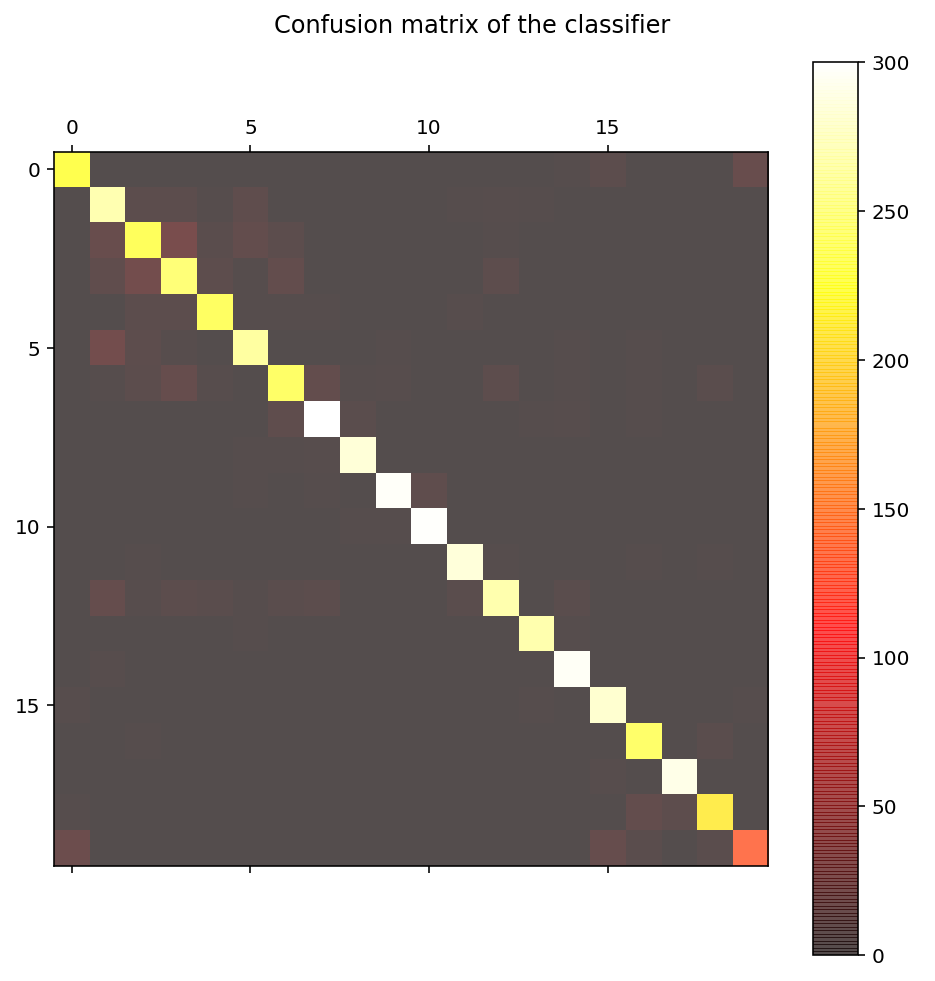

In [64]:
#Show confusion matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8),dpi=144)
plt.title("Confusion matrix of the classifier")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.matshow(cm,fignum=1,cmap='hot',alpha=.7)
plt.colorbar()

In [31]:
dy = load_files('dy')

In [32]:
dy

{'DESCR': None,
 'data': [b'\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\xe6\x96\x87\xe4\xbb\xb6\xe7\x9a\x84\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa232342432\n\n',
  b'this is other fujian\n',
  b'\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\xe6\x96\x87\xe4\xbb\xb6\xe7\x9a\x84\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\n\n',
  b'\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\xe6\x96\x87\xe4\xbb\xb6\xe7\x9a\x84\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\n\n',
  b'\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\xe6\x96\x87\xe4\xbb\xb6\xe7\x9a\x84\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\n\n'],
 'filenames': array(['dy/dy/1.txt', 'dy/dy/1 (另一个复件)', 'dy/dy/1 (复件)', 'dy/dy (复件)/1',
        'dy/dy (复件)/1 (复件)'], dtype='<U17'),
 'target': array([0, 0, 0, 1, 1]),
 'target_names': ['dy', 'dy (复件)']}

In [33]:
dy

{'DESCR': None,
 'data': [b'\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\xe6\x96\x87\xe4\xbb\xb6\xe7\x9a\x84\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa232342432\n\n',
  b'this is other fujian\n',
  b'\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\xe6\x96\x87\xe4\xbb\xb6\xe7\x9a\x84\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\n\n',
  b'\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\xe6\x96\x87\xe4\xbb\xb6\xe7\x9a\x84\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\n\n',
  b'\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\xe6\x96\x87\xe4\xbb\xb6\xe7\x9a\x84\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\n\n'],
 'filenames': array(['dy/dy/1.txt', 'dy/dy/1 (另一个复件)', 'dy/dy/1 (复件)', 'dy/dy (复件)/1',
        'dy/dy (复件)/1 (复件)'], dtype='<U17'),
 'target': array([0, 0, 0, 1, 1]),
 'target_names': ['dy', 'dy (复件)']}

In [35]:
dy.target_names

['dy', 'dy (复件)']